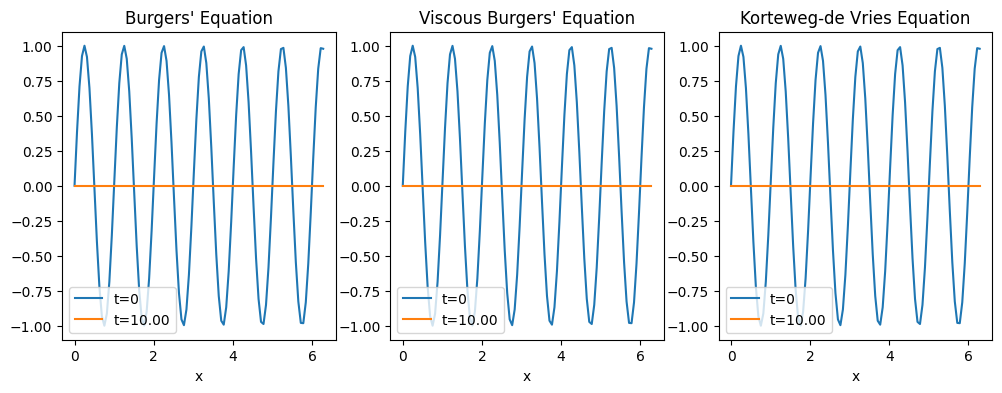

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def burgers_eq(u0, nt, dt, nx, dx):
    u = np.zeros((nt,nx))
    u[0] = u0
    u[1:,1:] = u[:-1,1:] - u[:-1,1:] * dt/dx * (u[:-1,1:] - u[:-1,:-1])
    u[:,0] = u[:,-1] # periodic BC
    return u

def burgers_viscous_eq(u0, nt, dt, nx, dx, nu):
    u = np.zeros((nt,nx))
    u[0] = u0
    u[1:,1:-1] = u[:-1,1:-1] - u[:-1,1:-1] * dt/dx * (u[:-1,1:-1] - u[:-1,:-2]) + nu*dt/dx**2 * (u[:-1,2:] - 2*u[:-1,1:-1] + u[:-1,:-2])
    u[:,0] = u[:,-2]
    u[:,-1] = u[:,1]
    return u

def kdv_eq(u0, nt, dt, nx, dx, nu, mu):
    u = np.zeros((nt,nx))
    u[0] = u0
    u[1:,2:-2] = u[:-1,2:-2] - mu*dt/dx**3*(u[:-1,4:]-2*u[:-1,3:-1]+2*u[:-1,1:-3]-u[:-1,:-4]) - nu*dt/dx*(u[:-1,3:-1]-u[:-1,1:-3]) - 3/2*dt/dx* u[:-1,2:-2]*(u[:-1,3:-1]-u[:-1,1:-3])
    u[:,0:2] = u[:,-3:-1]
    u[:,-2:] = u[:,1:3]
    return u

# Parameters
nx = 101
nt = 100
dx = 2*np.pi/(nx-1)
dt = 0.1
x = np.linspace(0, 2*np.pi, nx)

# Initial conditions
u0 = np.sin(2*np.pi*x)

# Simulate Burgers' equation
u = burgers_eq(u0, nt, dt, nx, dx)

# Simulate viscous Burgers' equation
nu = 0.03
uv = burgers_viscous_eq(u0, nt, dt, nx, dx, nu)

# Simulate KdV equation
nu = 0.02
mu = 0.02
uk = kdv_eq(u0, nt, dt, nx, dx, nu, mu)

# Plots
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(x,u0,label='t=0')
plt.plot(x,u[-1],label=f't={nt*dt:.2f}')
plt.title("Burgers' Equation")
plt.xlabel('x')
plt.legend()

plt.subplot(132)
plt.plot(x,u0,label='t=0')
plt.plot(x,uv[-1],label=f't={nt*dt:.2f}')
plt.title("Viscous Burgers' Equation")
plt.xlabel('x')
plt.legend()

plt.subplot(133)
plt.plot(x,u0,label='t=0')
plt.plot(x,uk[-1],label=f't={nt*dt:.2f}')
plt.title("Korteweg-de Vries Equation")
plt.xlabel('x')
plt.legend()
plt.show()

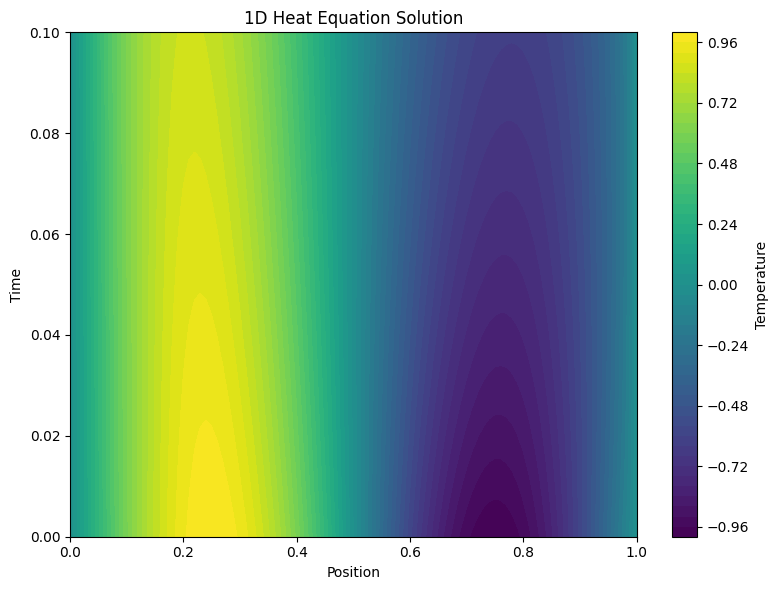

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def D(x):
    return x**2 * (1 - x)

def solve_heat_equation(N, dt, t_final):
    dx = 1 / (N - 1)
    x = np.linspace(0, 1, N)
    t = np.arange(0, t_final + dt, dt)
    u = np.zeros((len(t), N))
    
    # Initial condition
    u[0, :] = np.sin(2 * np.pi * x)
    
    # Boundary conditions
    u[:, 0] = 0
    u[:, -1] = 0
    
    # Finite difference scheme
    for n in range(len(t) - 1):
        for i in range(1, N - 1):
            D_plus = (D(x[i] + dx/2) + D(x[i] - dx/2)) / 2
            D_minus = (D(x[i] - dx/2) + D(x[i-1] + dx/2)) / 2
            u[n+1, i] = u[n, i] + (dt / dx**2) * (D_plus * (u[n, i+1] - u[n, i]) - D_minus * (u[n, i] - u[n, i-1]))
    
    return x, t, u

# Parameters
N = 101
dt = 1e-5
t_final = 0.1

x, t, u = solve_heat_equation(N, dt, t_final)

# Plot the solution
plt.figure(figsize=(8, 6))
plt.contourf(x, t, u, cmap='viridis', levels=50)
plt.colorbar(label='Temperature')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('1D Heat Equation Solution')
plt.tight_layout()
plt.show()

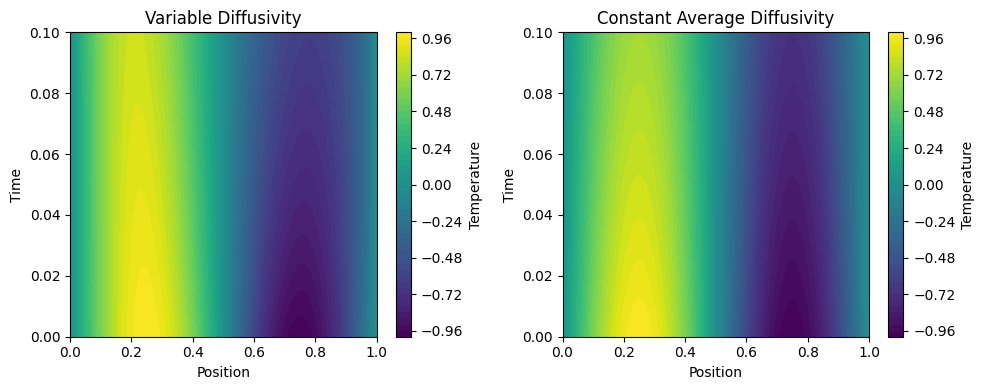

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def D(x):
    return x**2 * (1 - x)

def solve_heat_equation(N, dt, t_final, D_func):
    dx = 1 / (N - 1)
    x = np.linspace(0, 1, N)
    t = np.arange(0, t_final + dt, dt)
    u = np.zeros((len(t), N))
    
    u[0, :] = np.sin(2 * np.pi * x)
    u[:, 0] = 0
    u[:, -1] = 0
    
    for n in range(len(t) - 1):
        for i in range(1, N - 1):
            D_plus = (D_func(x[i] + dx/2) + D_func(x[i] - dx/2)) / 2
            D_minus = (D_func(x[i] - dx/2) + D_func(x[i-1] + dx/2)) / 2
            u[n+1, i] = u[n, i] + (dt / dx**2) * (D_plus * (u[n, i+1] - u[n, i]) - D_minus * (u[n, i] - u[n, i-1]))
    
    return x, t, u

N = 101
dt = 1e-5
t_final = 0.1

x, t, u_variable = solve_heat_equation(N, dt, t_final, D)
_, _, u_constant = solve_heat_equation(N, dt, t_final, lambda x: 1/12)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.contourf(x, t, u_variable, cmap='viridis', levels=50)
plt.colorbar(label='Temperature')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('Variable Diffusivity')

plt.subplot(1, 2, 2)
plt.contourf(x, t, u_constant, cmap='viridis', levels=50)
plt.colorbar(label='Temperature')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('Constant Average Diffusivity')

plt.tight_layout()
plt.show()

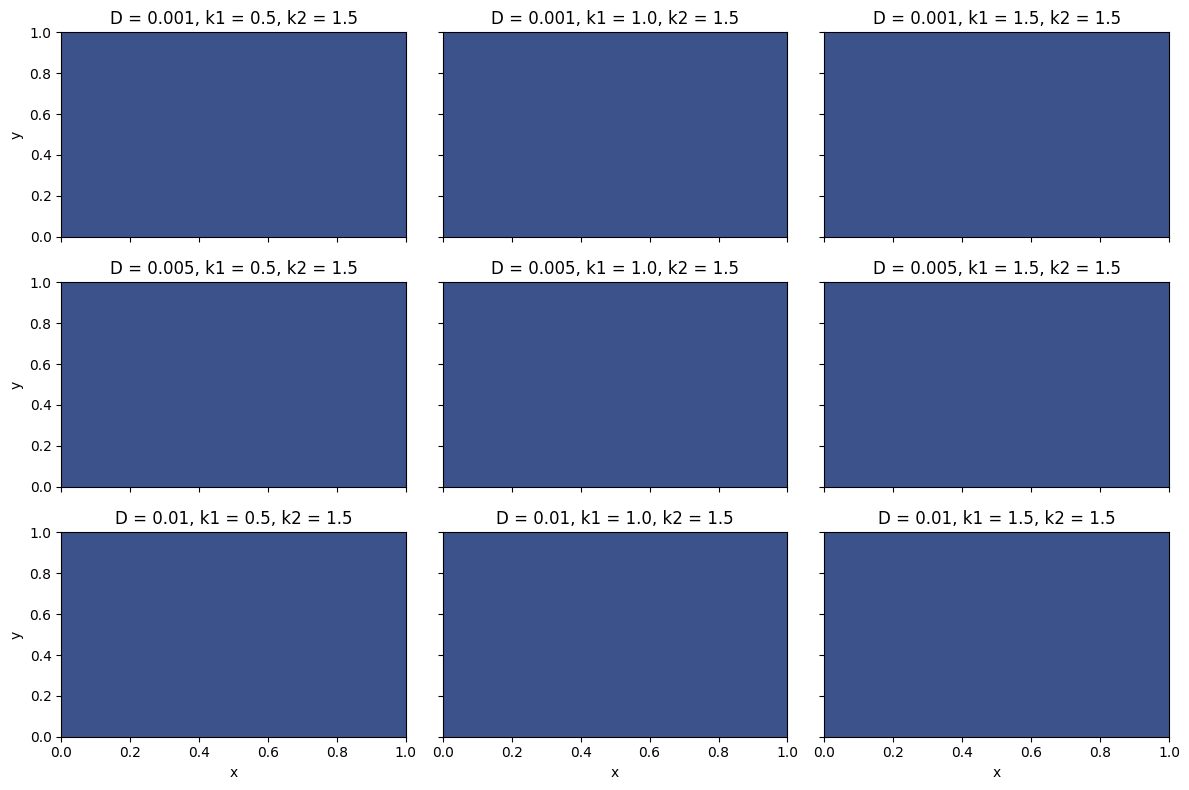

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_pde(Nx, Ny, Nt, D, k1, k2):
    Lx, Ly = 1.0, 1.0
    dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)
    dt = 0.001  # Choose an appropriate time step
    
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    t = np.linspace(0, dt * Nt, Nt + 1)
    
    u = np.zeros((Nt + 1, Ny, Nx))
    X, Y = np.meshgrid(x, y, indexing='ij')
    
    u[0] = np.exp(-((X - 0.5)**2 + (Y - 0.5)**2) / 0.05)
    
    laplacian = (np.roll(u, 1, axis=2) + np.roll(u, -1, axis=2) - 2*u) / dx**2 + \
                (np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 2*u) / dy**2
    
    u[1:] = u[:-1] + dt * (k1 * (1 - u[:-1]/k2) * u[:-1] + D * laplacian[:-1])
    
    # Apply boundary conditions (Neumann)
    u[:, 0, :] = u[:, 1, :]  # y = 0
    u[:, -1, :] = u[:, -2, :]  # y = Ly
    u[:, :, 0] = u[:, :, 1]  # x = 0
    u[:, :, -1] = u[:, :, -2]  # x = Lx
    
    return x, y, t, u

# Parameters to experiment with
D_values = [0.001, 0.005, 0.01]
k1_values = [0.5, 1.0, 1.5]
k2_values = [0.5, 1.0, 1.5]

Nx, Ny = 101, 101
Nt = 500

fig, axes = plt.subplots(len(D_values), len(k1_values), figsize=(12, 8), sharex=True, sharey=True)

for i, D in enumerate(D_values):
    for j, k1 in enumerate(k1_values):
        for k, k2 in enumerate(k2_values):
            x, y, t, u = solve_pde(Nx, Ny, Nt, D, k1, k2)
            
            ax = axes[i, j]
            cs = ax.contourf(x, y, u[-1], cmap='viridis', levels=20)
            ax.set_title(f'D = {D}, k1 = {k1}, k2 = {k2}')
            
            if i == len(D_values) - 1:
                ax.set_xlabel('x')
            if j == 0:
                ax.set_ylabel('y')

fig.tight_layout()
plt.show()

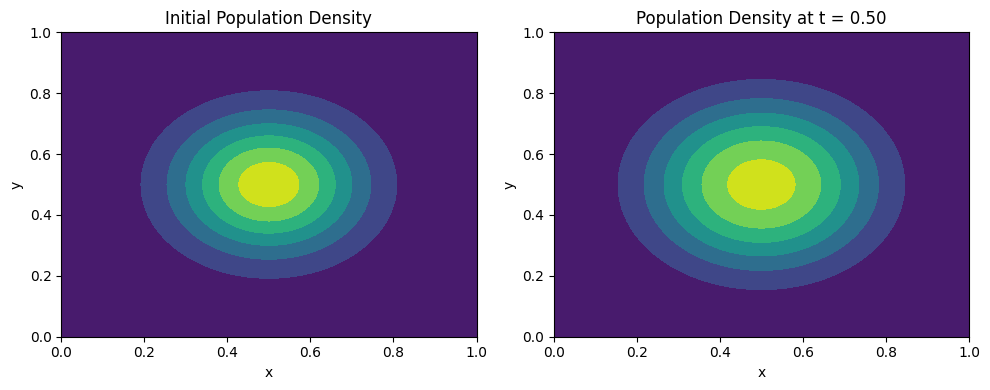

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def solve_pde(Nx, Ny, Nt, D, k1, k2):
    Lx, Ly = 1.0, 1.0
    dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)
    dt = 0.001  # Choose an appropriate time step
    
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    t = np.linspace(0, dt * Nt, Nt + 1)
    
    u = np.zeros((Nt + 1, Ny, Nx))
    X, Y = np.meshgrid(x, y, indexing='ij')
    
    u[0] = np.exp(-((X - 0.5)**2 + (Y - 0.5)**2) / 0.05)
    
    for n in range(Nt):
        un = u[n]
        u[n+1, 1:-1, 1:-1] = un[1:-1, 1:-1] + dt * (
            k1 * (1 - un[1:-1, 1:-1] / k2) * un[1:-1, 1:-1] + 
            D * ((un[1:-1, 2:] - 2*un[1:-1, 1:-1] + un[1:-1, :-2]) / dx**2 + 
                 (un[2:, 1:-1] - 2*un[1:-1, 1:-1] + un[:-2, 1:-1]) / dy**2)
        )
        
    return x, y, t, u

Nx, Ny = 101, 101
Nt = 500
D = 0.001
k1 = 1.0
k2 = 1.0

x, y, t, u = solve_pde(Nx, Ny, Nt, D, k1, k2)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].contourf(x, y, u[0], cmap='viridis')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Initial Population Density')

ax[1].contourf(x, y, u[-1], cmap='viridis')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'Population Density at t = {t[-1]:.2f}')

plt.tight_layout()
plt.show()

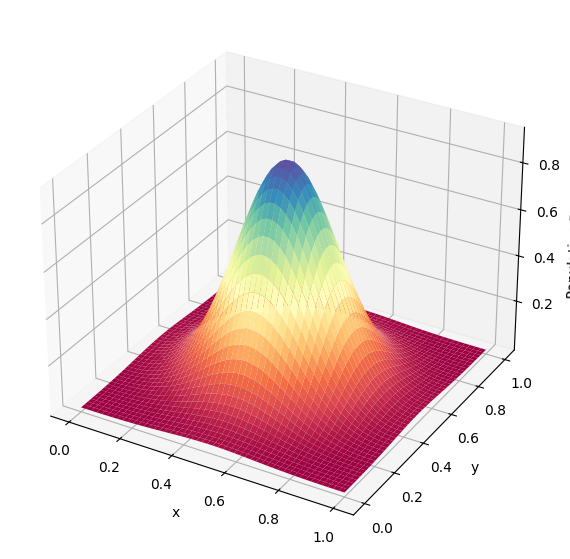

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_growth_diffusion_3d(k1, k2, D, N=50, t_final=1.0, dt=0.001):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)
    
    dx = dy = 1 / (N - 1)
    u = np.zeros((N, N, int(t_final/dt)+1))
    
    u[:,:,0] = np.exp(-((X-0.5)**2 + (Y-0.5)**2) / 0.05) # initial condition

    for n in range(int(t_final/dt)):
        u_new = u[:,:,n] + dt * (k1 * u[:,:,n] * (1 - u[:,:,n]/k2) 
                                 + D * ((np.roll(u[:,:,n], 1, axis=0) - 2*u[:,:,n] + np.roll(u[:,:,n], -1, axis=0)) / dx**2
                                        + (np.roll(u[:,:,n], 1, axis=1) - 2*u[:,:,n] + np.roll(u[:,:,n], -1, axis=1)) / dy**2))
        u_new[0,:] = u_new[-2,:] 
        u_new[-1,:] = u_new[1,:]
        u_new[:,0] = u_new[:,-2]
        u_new[:,-1] = u_new[:,1]
        u[:,:,n+1] = u_new
        
    return X, Y, u

k1, k2, D = 0.1, 1.0, 0.001
X, Y, u = logistic_growth_diffusion_3d(k1, k2, D)

ax = plt.figure(figsize=(12,7)).add_subplot(projection='3d')
ax.plot_surface(X, Y, u[:,:,-1], cmap='Spectral')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Population Density')
plt.show()

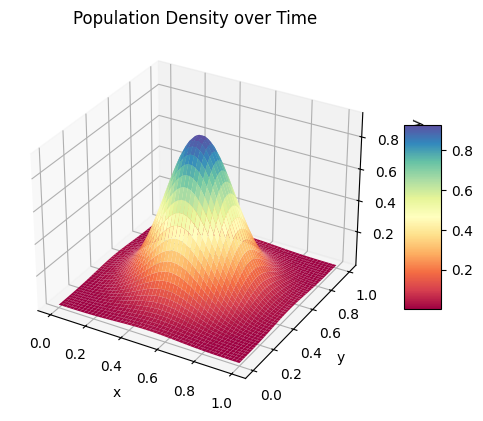

In [5]:
# logistic growth with diffusion in a 2D space using an explicit finite difference method.
def logistic_growth_diffusion(k1, k2, D, N=50, t_final=1, dt=0.001):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y) # Create a 3D grid
    
    dx = dy = 1 / (N - 1)
    u = np.zeros((N, N))
    
    # Initial condition
    u_initial = np.exp(-((X-0.5)**2 + (Y-0.5)**2) / 0.05)
    u = u_initial.copy()

    # Time stepping
    for _ in range(int(t_final/dt)):
        # Copy the old values
        u_old = u.copy()
        
        # Finite difference method
        for i in range(1, N-1):
            for j in range(1, N-1):
                u_xx = (u_old[i+1, j] - 2*u_old[i, j] + u_old[i-1, j]) / dx**2
                u_yy = (u_old[i, j+1] - 2*u_old[i, j] + u_old[i, j-1]) / dy**2
                growth = k1 * u_old[i, j] * (1 - u_old[i, j]/k2)
                diffusion = D * (u_xx + u_yy)
                
                u[i, j] = u_old[i, j] + dt * (growth + diffusion)

        # Neumann boundary conditions (zero-gradient)
        u[0, :] = u[1, :]
        u[-1, :] = u[-2, :]
        u[:, 0] = u[:, 1]
        u[:, -1] = u[:, -2]

    return X, Y, u

k1, k2, D = 0.1, 1.0, 0.001
X, Y, u = logistic_growth_diffusion(k1, k2, D)

# Plotting the results
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, u, cmap='Spectral')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('Population Density over Time')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Population Density')
plt.show()